## ML Model Comparison of data taken from heart-disease-uci 

Analysis of some heart data from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). 
The data contains the following fields:

* age :         Numeric, age in years
* sex :         Numeric, (1 = male; 0 = female)
* cp :          Numeric, chest pain type
* trestbps :    Numeric, resting blood pressure (in mm Hg on admission to the hospital)
* chol :        Numeric, serum cholestoral in mg/dl
* fbs :         Numeric, (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg :     Numeric, resting electrocardiographic results
* thalach :     Numeric, maximum heart rate achieved
* exang :       Numeric, exercise induced angina (1 = yes; 0 = no)
* oldpeak :     Numeric, ST depression induced by exercise relative to rest
* slope :       Numeric, the slope of the peak exercise ST segment
* ca :          Numeric, number of major vessels (0-3) colored by flourosopy
* thal :        Numeric, 3 = normal; 6 = fixed defect; 7 = reversable defect
* target :      Numeric, 1 or 0

### Data and Setup

In [2]:
#  Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries and set %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Read in the csv file as a dataframe called df
df = pd.read_csv("heart.csv")

In [4]:
# Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Check the head of df 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration & Basic Querying

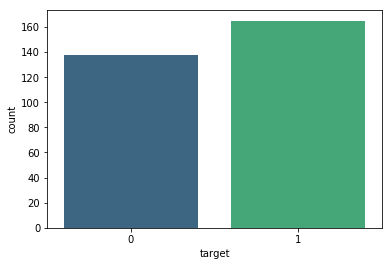

In [6]:
sns.countplot(x="target", data=df, palette="viridis")
plt.show()

In [7]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
totalPatients = len(df)
print("Percentage of Patients without Heart Disease: {:.1f}%".format(countNoDisease / totalPatients*100))
print("Percentage of Patients with Heart Disease: {:.1f}%".format(countHaveDisease / totalPatients*100))

Percentage of Patients without Heart Disease: 45.5%
Percentage of Patients with Heart Disease: 54.5%


What are the top 5 old age records?

In [8]:
df['age'].value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

What are the top 5 yung age records?

In [9]:
df['age'].value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

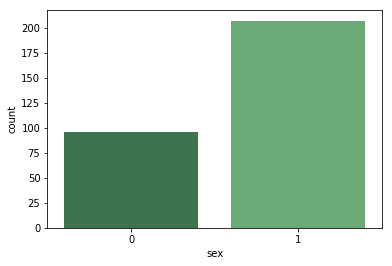

In [10]:
sns.countplot(x='sex',data=df,palette='Greens_d')
plt.show()

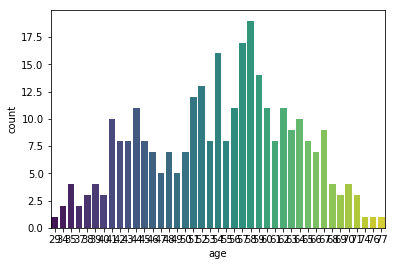

In [11]:
sns.countplot(x='age',data=df,palette='viridis')
plt.show()

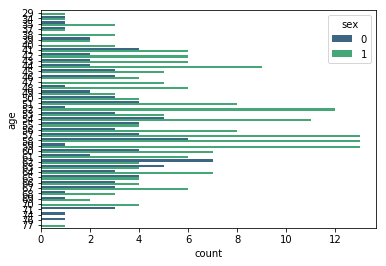

In [12]:
sns.countplot(y="age", hue="sex", data=df, palette="viridis")
plt.show()

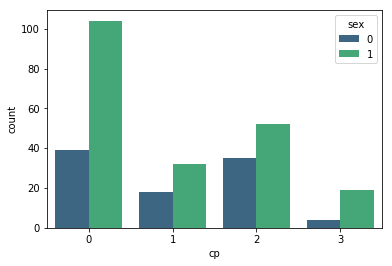

In [13]:
sns.countplot(x="cp", hue="sex", data=df, palette="viridis");

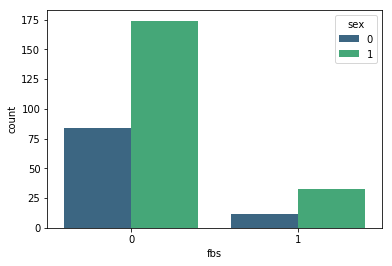

In [14]:
# fasting blood sugar > 120 mg/dl : (1 = true; 0 = false)
sns.countplot(x="fbs", hue="sex", data=df, palette="viridis")
plt.show()

In [15]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


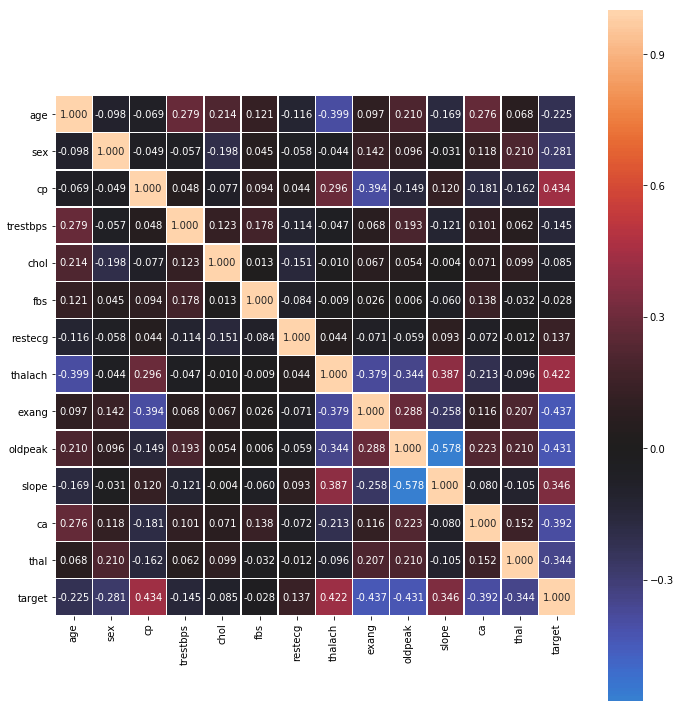

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,
            square=True,
            center=0,
            linewidths=.5,
            annot=True,
            fmt='.3f')
plt.tight_layout()

plt.show()

## Preparing the data for Analysis

In [17]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [18]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [21]:
# Split the dataframe into x_data matrix and y vector

y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
# Normalize the x_data

min_x_data = np.min(x_data)
max_x_data = np.max(x_data)

x = (x_data - min_x_data) / (max_x_data - min_x_data).values

In [23]:
# Split the x_data. 
# train data = 80% of the data
# test data = 20% of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

## Data Analysis

### Predict if a patient has this disease or not

In [24]:
# LogisticRegression Algorithm 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
LogisticRegression_score = lr.score(x_test,y_test)*100
print("Logistic Regression Accuracy {:.2f}%".format(LogisticRegression_score))

Logistic Regression Accuracy 86.89%


In [26]:
# Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

Random_Forest_score = rf.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(Random_Forest_score))

Random Forest Algorithm Accuracy Score : 88.52%


In [27]:
# KNN Model where k = 2
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("KNN with K={} Accuracy Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

KNN with K=2 Accuracy Score: 77.05%


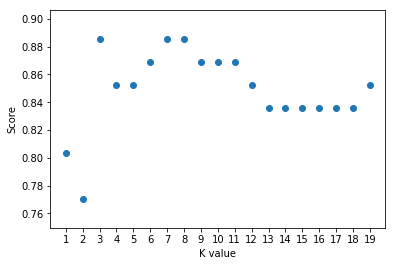

Maximum KNN Score is 88.52% for K= 3


In [28]:
# Find the best k value for KNN
scoreList = []
for k in range(1,20):
    max_knn = KNeighborsClassifier(n_neighbors = k)  # n_neighbors means k
    max_knn.fit(x_train, y_train)
    scoreList.append(max_knn.score(x_test, y_test))
    
plt.scatter(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


max_k_value = max(scoreList)
k_max = scoreList.index(max_k_value)+1

KNN_score = max_k_value *100
print("Maximum KNN Score is {:.2f}% for K= {}".format((KNN_score),k_max))

In [29]:
# Support Vector Machine (SVM) Algorithm
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVM_score = svm.score(x_test,y_test)*100
print("SVM Algorithm Accuracy Score: {:.2f}%".format(SVM_score))

SVM Algorithm Accuracy Score: 86.89%


In [30]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

Naive_Bayes_score = nb.score(x_test,y_test)*100
print("Naive Bayes Accuracy Score: {:.2f}%".format(Naive_Bayes_score))

Naive Bayes Accuracy Score: 86.89%


In [31]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

Decision_Tree_score = dtc.score(x_test, y_test)*100
print("Decision Tree Accuracy Score {:.2f}%".format(Decision_Tree_score))

Decision Tree Accuracy Score 77.05%


## Models Comparison

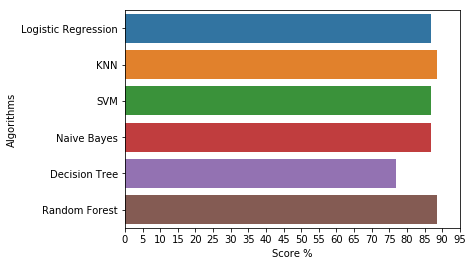

Best Accuracy Score Algorithm is KNN with result of 88.52%


In [32]:
algorithms = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
score = [LogisticRegression_score,KNN_score, SVM_score, Naive_Bayes_score, Decision_Tree_score, Random_Forest_score]

sns.barplot(x=score, y=algorithms)
plt.xlabel("Score %")
plt.ylabel("Algorithms")
plt.rcParams.update({'font.size': 12})
plt.xticks(np.arange(0,100,5))
plt.show()

best_score_value = max(score)
best_score = algorithms[score.index(best_score_value)]

print("Best Accuracy Score Algorithm is {} with result of {:.2f}%".format(best_score, best_score_value))